#### Régression multiple 
##### Dataset : Profit 

##### * Bibliothèques 

##### Import des bibliothèques : 
* Pandas pour la manipulation de données 
* NumPy pour le calcul numériques  
* matplotlib.pyplot pour la visualisation 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

##### * Modules scikit-learn

In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import metrics 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Chargement des données

In [3]:
df = pd.read_csv('Datasets/profit.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,New York,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Les premiers lignes 

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


#### Création de nuage de points

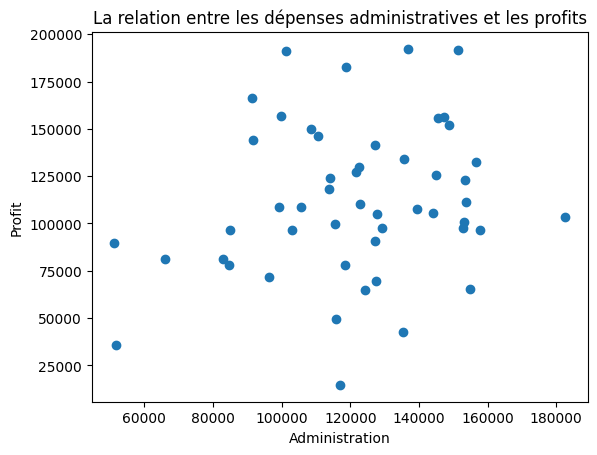

In [5]:
plt.scatter(df['Administration'], df['Profit'])
plt.title ('La relation entre les dépenses administratives et les profits') 
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

#### extraction des données d'entrée (X) et (Y)

In [14]:
X = df.iloc[:, :-1].values
Y= df.iloc[:,-1].values

#### Normalisation des trois opremières caractéristiques de X 

* RobustScaler

In [16]:
scaler = preprocessing.RobustScaler()
X[:, 0:3] = scaler.fit_transform(X [:, 0:3])

#### Encodage des données catégoriques dans X 

* LabelEncoder

In [17]:
encoder = preprocessing.LabelEncoder()
X[:,3]= encoder.fit_transform(X[:,3])

#### Séparation des données 

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state = 42) 

In [23]:
print(X_train.shape, X_test.shape) 
print(Y_train.shape, Y_test.shape)

(40, 4) (10, 4)
(40,) (10,)


#### Initialisation d'un modèle de régression linéaire 

In [19]:
model = linear_model.LinearRegression()

#### Entrainement du modèle sur les données d'entrainement 

In [20]:
model.fit(X_train, Y_train)

LinearRegression()

#### Prédiction des valeurs cibles (Y_pred) à partir des données de test (X_test)

In [21]:
Y_pred= model.predict(X_test)

#### Création d'un DataFrame pour comparer les valeurs réelles (Y_test) et prédites (Y_pred)

In [22]:
comp = pd.DataFrame({'Y_test' : Y_test.flatten(), 'Y_pred': Y_pred.flatten()})
print (comp)

      Y_test         Y_pred
0  134307.35  127202.248189
1   81005.76   85158.719593
2   99937.59   98373.975432
3   64926.08   45950.765206
4  125370.37  128747.724247
5   35673.41   50190.507209
6  105733.54  108609.797942
7  107404.34  101362.243996
8   97427.84   98144.716035
9  122776.86  112738.587323


#### Calcul et affichage des différents métriques

In [25]:
R_squared= r2_score(Y_test, Y_pred)
R_squared

0.9014005842170636

#### Prévoir le profit de l'entreprise pour l'entrée E (142007, 91321, 366268, California)

In [ ]:
entree = np.array([[142007, 91321, 366268, 'California']])

* DataFrame is for pandas
* Table is for numpy 